In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regression

In [96]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m,1)

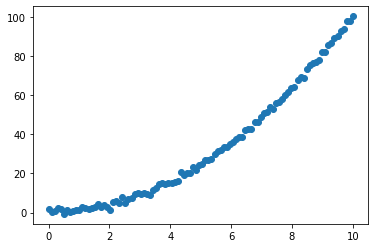

In [97]:
plt.scatter(X,y)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

C:\Users\Toufik\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


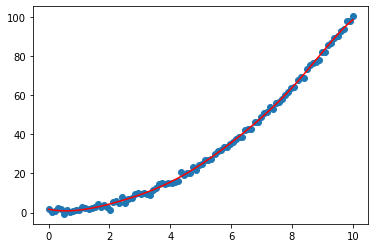

In [99]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions, c='r')

# Classification

In [144]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [145]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
model = KNeighborsClassifier()

In [148]:
y = titanic['survived']
X = titanic.drop(['survived'], axis=1)

In [105]:
model.fit(X,y)
model.score(X,y)

0.8319327731092437

In [106]:
def survie(model, pclass=3, sex=0, age=23):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [107]:
survie(model)

[0]
[[1. 0.]]


# Exercice

In [141]:
def meilleur_KN():
    scores = []
    for i in range(1, 11):
        model = KNeighborsClassifier(i)
        y = titanic['survived']
        X = titanic.drop(['survived'], axis=1)
        model.fit(X,y)
        scores.append(model.score(X,y))
    
    print(scores)
    print(f'Best score : {scores.index(max(scores))}')
    plt.plot(scores)

[0.8473389355742297, 0.8585434173669467, 0.8585434173669467, 0.8403361344537815, 0.8319327731092437, 0.8221288515406162, 0.8207282913165266, 0.8109243697478992, 0.8179271708683473, 0.8053221288515406]
Best score : 1


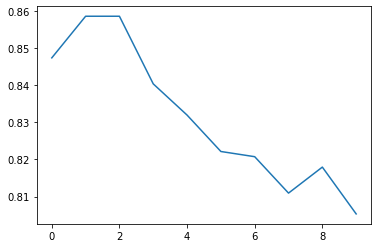

In [142]:
meilleur_KN()

# Train_test_split

In [29]:
from sklearn.datasets import load_iris

(150, 4)


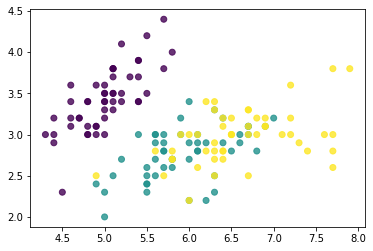

In [111]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test set')

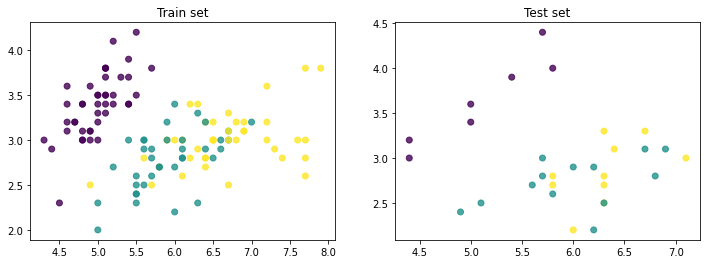

In [114]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)
print('Train score : ', model.score(x_train, y_train))
print('Test score : ', model.score(x_test, y_test))

Train score :  1.0
Test score :  0.9333333333333333


# Cross validation

In [117]:
from sklearn.model_selection import cross_val_score

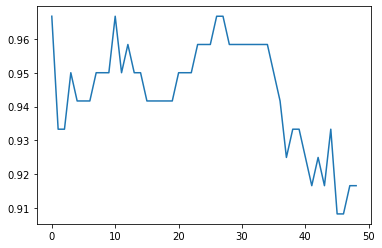

In [118]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
    
plt.plot(val_score)

# Validation Curve

In [119]:
from sklearn.model_selection import validation_curve

C:\Users\Toufik\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


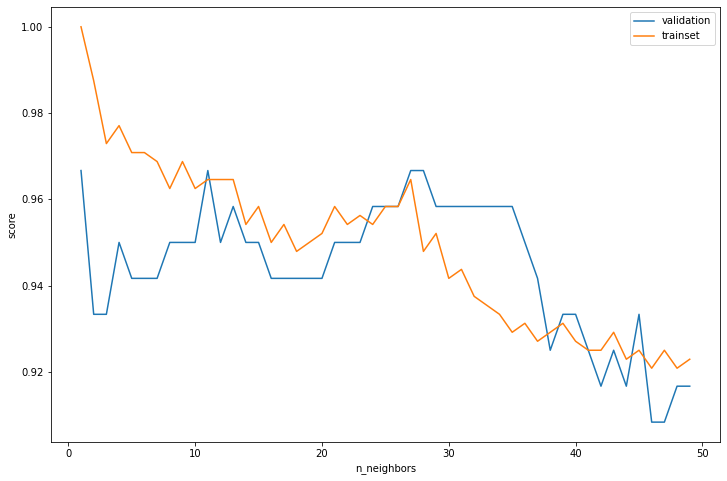

In [125]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)

plt.figure(figsize=(12,8))
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='trainset')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# GridSearchCV

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid = {'n_neighbors' : np.arange(1,20),
             'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [128]:
grid.best_score_

0.9666666666666668

In [129]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [130]:
model = grid.best_estimator_

In [131]:
model.score(x_test, y_test)

1.0

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

# Learning_curve

In [134]:
from sklearn.model_selection import learning_curve

[19 38 57 76 96]


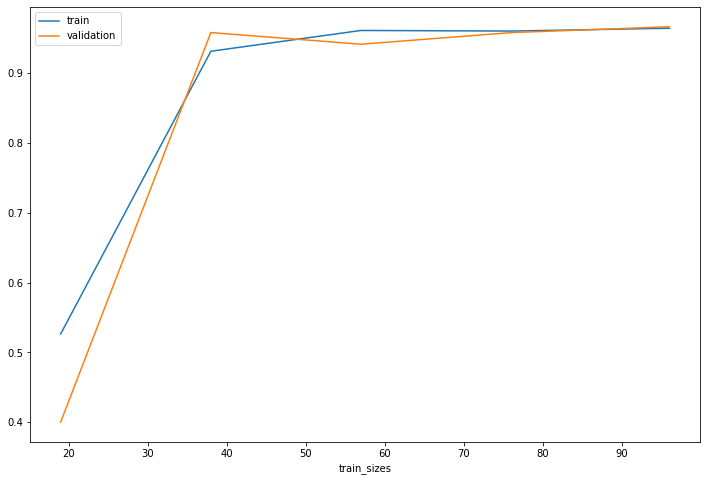

In [140]:
N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes = np.linspace(0.2,1.0, 5), cv=5)

print(N)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

# Amelioration de l'exercice de l'exercice Titanic

In [143]:
# 1) Créer un Train set et un Test set. Entrainer puis évaluer.
# 2) Avec GridSearch, trouver les meilleurs hyper-parametres n_neighbors, metrics et weights
# 3) Est-ce que collerter plus de données serait utile?

In [149]:
# 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [152]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [153]:
grid.best_score_

0.7828680396643783

In [154]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 10}

In [155]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.7342657342657343

[ 91 182 273 364 456]


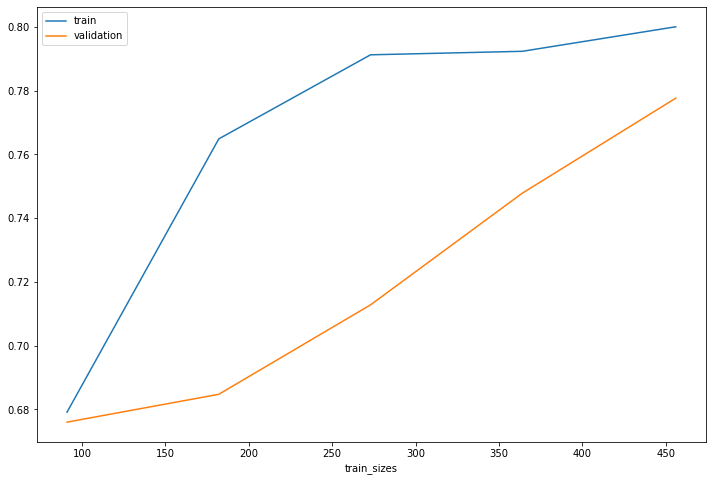

In [156]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2,1.0, 5), cv=5)

print(N)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

# Data preprocessing

In [158]:
from sklearn.preprocessing import LabelEncoder

In [159]:
X = np.array(['Chat',
             'Chien',
             'Chat',
             'Oiseau'])

In [160]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [161]:
transformer.transform(X)

array([0, 1, 0, 2], dtype=int64)

In [162]:
#ou
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

# Differents transformer du preprocessing

## 1) Encodage

In [1]:
# Encodage ordinal : LabelEncoder() & OrdinalEncoder()

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [10]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [11]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [12]:
X = np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Chat', 'Poils'],
            ['Oiseau', 'Plumes']])

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encoder_mult = OrdinalEncoder()
encoder_mult.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [15]:
# Encodage en plusieurs dimmension : LabelBinarizer() & MultiLabelBinarizer() & OneHotEncoder()

In [16]:
from sklearn.preprocessing import LabelBinarizer

In [22]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## 2) Normalisation

In [24]:
# on encode les variables qualitatives
# on normalise les variables quantitatives

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
X = np.array([[70],
             [80],
             [120]])

In [39]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

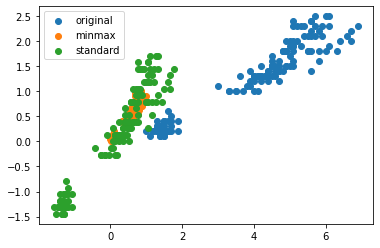

In [43]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_stand = StandardScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], label='original')
plt.scatter(X_minmax[:,2], X_minmax[:,3], label='minmax')
plt.scatter(X_stand[:,2], X_stand[:,3], label='standard')
plt.legend()
plt.show()

## 3) Standardisation

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

## 4) RobustScaler

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
iris = load_iris()
X = iris.data

outliers = np.full((10,4), 100) + np.random.randn(10,4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stand = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], label='original')
plt.scatter(X_minmax[:,2], X_minmax[:,3], label='minmax')
plt.scatter(X_stand[:,2], X_stand[:,3], label='standard')
plt.scatter(X_robust[:,2], X_robust[:,3], label='robust')
plt.legend()
plt.show()

## 5) PolynomialFeatures

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
X = np.array([[1],
             [2],
             [0.5]])

In [57]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [66]:
X = np.linspace(0,4,100).reshape((100,1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X,y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly,y)
y_pred = model.predict(X_poly)

plt.plot(X,y_pred, c='r', lw=3)
plt.show()

## 6) Discrétisation

In [69]:
from sklearn.preprocessing import KBinsDiscretizer, Binarizer

In [68]:
X = np.linspace(0,5,10).reshape((10,1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [70]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [72]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Pipeline

## 1) Basic

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [91]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [75]:
#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#Test
X_test_transformed = scaler.fit_transform(X_test)
model.predict(X_test_transformed)

array([0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0])

## 2) Avec pipeline

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [92]:
model = make_pipeline(StandardScaler(),
                     SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [96]:
#Exemple :

model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree' : [2,3,4],
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4]})

In [97]:
grid.best_params_

{'polynomialfeatures__degree': 3}

In [98]:
grid.score(X_test, y_test)

0.9473684210526315

# Feature selection

## 1) VarianceThreshold

In [3]:
from sklearn.feature_selection import VarianceThreshold

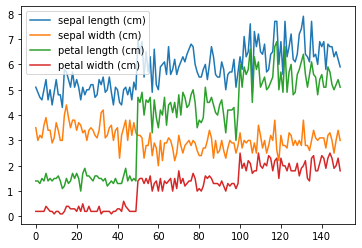

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [102]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [105]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [109]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## 2) SelectKBest

In [4]:
from sklearn.feature_selection import SelectKBest, chi2

In [6]:
chi2(X,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [9]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

## 3) SelectFromModel

In [2]:
from sklearn.feature_selection import SelectFromModel

In [9]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit_transform(X,y)
selector.get_support()

selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

## 4) RFE + RFECV

In [10]:
from sklearn.feature_selection import RFE, RFECV

In [12]:
selector = RFECV(SGDClassifier(), step=1, min_features_to_select=2, cv=4)

selector.fit_transform(X,y)
selector.ranking_
selector.grid_scores_

array([0.89278094, 0.87962304, 0.80618777])